In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
dataset = pd.read_csv("/content/drive/My Drive/Ensemble Techniques Mahesh Anand/prima-indians-diabetes.data",names=colnames)

In [ ]:
dataset['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [ ]:
268/768

0.3489583333333333

In [ ]:
dataset.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.corr()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
X=dataset[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=dataset['outcome']

In [20]:
for i in np.arange(dataset.shape[0]):
  if dataset['bp'][i]==0:
    dataset['bp'][i]=72.0
for i in np.arange(dataset.shape[0]):
  if dataset['preg'][i]==0:
    dataset['preg'][i]=3.0
for i in np.arange(dataset.shape[0]):
  if dataset['glu'][i]==0:
    dataset['glu'][i]=117.0
for i in np.arange(dataset.shape[0]):
  if dataset['sft'][i]==0:
    dataset['sft'][i]=23.0
for i in np.arange(dataset.shape[0]):
  if dataset['ins'][i]==0:
    dataset['ins'][i]=30.5
for i in np.arange(dataset.shape[0]):
  if dataset['bmi'][i]==0:
    dataset['bmi'][i]=32.0

In [7]:
D=dataset.groupby('outcome')
d1=D.get_group(1)
d2=D.get_group(0)
d1.shape,d2.shape

((268, 9), (500, 9))

In [8]:
from scipy.stats import ttest_ind

In [9]:
for col in X.columns:
  t_stat,p_val=ttest_ind(d1[col],d2[col])
  print(p_val)

5.300704818649035e-12
3.1287190418423694e-48
3.8908354906479115e-06
1.3011814339570038e-07
3.7594489993751756e-05
7.879147621569232e-19
1.254607010148809e-06
2.2099754606654358e-11


In [ ]:
X.sample(5)

,preg,glu,bp,sft,ins,bmi,dpf,age
488,4,99,72,17,30,25.6,0.294,28
72,13,126,90,23,30,43.4,0.583,42
610,3,106,54,21,158,30.9,0.292,24
410,6,102,90,39,30,35.7,0.674,28
716,3,173,78,39,185,33.8,0.970,31


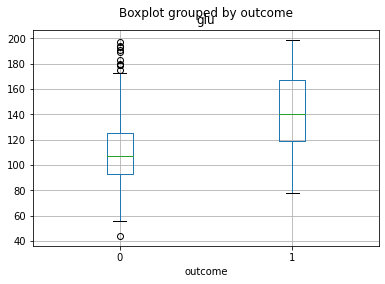

In [ ]:
dataset.boxplot(column='glu',by='outcome')

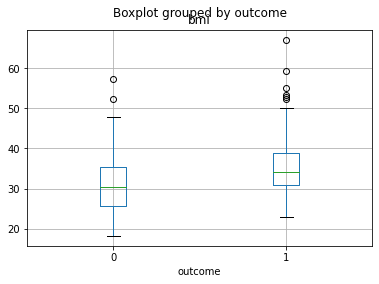

In [ ]:
dataset.boxplot(column='bmi',by='outcome')

In [21]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [ ]:
X_std.shape

(768, 8)

In [ ]:
cov_matrix = np.cov(X_std.T)
cov_matrix.shape

(8, 8)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vecs

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [ ]:
eig_vecs[:,0]

array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
       -0.45194134, -0.27061144, -0.19802707])

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.097110557994527,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.7334672594471245,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (0.42036352804956717,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0.08609107,  0.71208542])),
 (0.4049893778148991,
  array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
         -0.34151764, -0.00825873, -0.21166198])),
 (0.6835183858447287,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.7633383156496728,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.8766705419094803,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, 

In [ ]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(2.097110557994527,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.7334672594471245,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (1.0309722810083823,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (0.8766705419094803,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (0.7633383156496728,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.6835183858447287,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.42036352804956717,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, 

In [ ]:
2.097110557994527/np.sum(eig_vals)

0.2617974931611006

In [ ]:
1.7334672594471245/np.sum(eig_vals)

0.21640126757746497

In [ ]:
0.38/np.sum(eig_vals)

0.047438151041666675

In [ ]:
27.8+19.9+13.6

61.300000000000004

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.871943    48.11267206  61.75779669  72.87328077  82.39919653
  89.26456935  95.19571028 100.        ]


In [ ]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 

In [ ]:
P_reduce = np.array(eigvectors_sort[0:6]).transpose()
P_reduce

array([[-0.1284321 , -0.59378583,  0.01308692, -0.08069115,  0.47560573,
        -0.19359817],
       [-0.39308257, -0.17402908, -0.46792282,  0.40432871, -0.46632804,
        -0.09416176],
       [-0.36000261, -0.18389207,  0.53549442, -0.05598649, -0.32795306,
         0.6341159 ],
       [-0.43982428,  0.33196534,  0.2376738 , -0.03797608,  0.48786206,
        -0.00958944],
       [-0.43502617,  0.25078106, -0.33670893,  0.34994376,  0.34693481,
         0.27065061],
       [-0.45194134,  0.1009598 ,  0.36186463, -0.05364595, -0.25320376,
        -0.68537218],
       [-0.27061144,  0.122069  , -0.43318905, -0.8336801 , -0.11981049,
         0.08578409],
       [-0.19802707, -0.62058853, -0.07524755, -0.0712006 ,  0.10928996,
         0.03335717]])

In [ ]:
# Let's project our feature space data into PC domain
X_pca = np.dot(X_std,P_reduce) #768 x 8 DOT 8 x 5
X_pca.shape

(768, 6)

In [22]:
from sklearn import model_selection

In [10]:
model=LogisticRegression()

In [13]:
kf=model_selection.KFold(n_splits=5,shuffle=True,random_state=2)
score=model_selection.cross_val_score(model,X_std,Y,cv=kf,scoring='roc_auc')
np.mean(1-score),np.std(score,ddof=1)

(0.17006869143157094, 0.02980017051838834)

In [12]:
score=model_selection.cross_val_score(model,X_pca,Y,cv=kf,scoring='roc_auc')
np.mean(1-score),np.std(score,ddof=1)

NameError: ignored

In [ ]:
(0.02799976847776983-0.027005559087898496)/0.02799976847776983

0.0355077718110661

In [ ]:
(0.17006869143157094-0.16852039274167435)/0.17006869143157094

0.009103960740002302

In [ ]:
model.fit(X_std,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test=X_std[5,:]
test_x=np.array([test])
test_x

array([[ 0.3429808 , -0.15318486,  0.22493077, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966]])

In [ ]:
model.predict(test_x)

array([0])

In [ ]:
print('Bias_error',np.mean(1-score))

Bias_error 0.1689601677148847


In [ ]:
print('Var_error',np.std(score,ddof=1))

Var_error 0.025112582741715354


In [ ]:
(0.0264-0.025)/0.0264

0.05303030303030297

#Model without 'Bp', BE=0.168, VE=0.025
#Model with 'Bp' without any treatment,BE=0.167,VE=0.0264
#Model with 'BP' after log transformed,BE=0.1689,VE=0.0251

In [ ]:
np.std(score,ddof=1)


0.024978506490688317

In [ ]:
np.std(1-score,ddof=1)

0.02497850649068832

In [ ]:
np.mean(1-score)

0.17016491963661776

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
knn=KNeighborsClassifier()
#n_neighbors ideal search range could be 15-20% of size of data
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
kf=KFold(n_splits=5,shuffle=True,random_state=2)
GS=GridSearchCV(knn,param,cv=kf,scoring='roc_auc')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
GS.best_params_            #we got highest avg of auc

{'n_neighbors': 50, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import GridSearchCV
RF=RandomForestClassifier(random_state=0)
param={'n_estimators':np.arange(1,100),'criterion':['entropy','gini']}
GS=GridSearchCV(RF,param,cv=5,scoring='roc_auc')
GS.fit(X_std,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [ ]:
GS.best_params_

{'criterion': 'entropy', 'n_estimators': 98}

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param2={'n_estimators':np.arange(1,25)}
GS2=GridSearchCV(NB_bag,param2,cv=kf,scoring='roc_auc')
GS2.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=GaussianNB(priors=None,
                                                                   var_smoothing=1e-09),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=0,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verb

In [ ]:
GS2.best_params_

{'n_estimators': 24}

In [ ]:
knn_be=[]
knn_ve=[]
for n in np.arange(1,200):
  knn=KNeighborsClassifier(n_neighbors=n)
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(knn,X_std,Y,cv=kfold,scoring='roc_auc')
  knn_be.append(np.mean(1-scores))
  knn_ve.append(np.std(scores,ddof=1))

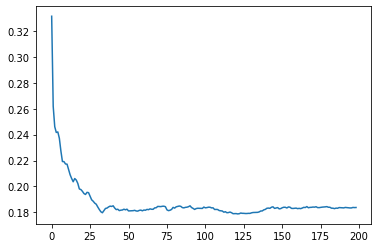

In [ ]:
x_axis=np.arange(len(knn_be))
plt.plot(x_axis,knn_be)

In [ ]:
np.argmin(knn_be),np.min(knn_be),knn_ve[121]

(121, 0.17877376879245785, 0.03198396894769458)

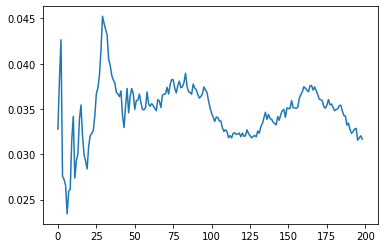

In [ ]:
x_axis=np.arange(len(knn_ve))
plt.plot(x_axis,knn_ve)

In [ ]:
np.argmin(knn_ve),np.min(knn_ve),knn_be[6]

(6, 0.02341654209983238, 0.22737046368099376)

In [ ]:
knn_be_sc=knn_be/np.max(knn_be)
knn_ve_sc=knn_ve/np.max(knn_ve)


In [ ]:
knn_be_sc[:50]

array([1.        , 0.79005482, 0.74265673, 0.72922511, 0.73044458,
       0.71565778, 0.6860718 , 0.66149647, 0.66131087, 0.65577975,
       0.65534881, 0.64280376, 0.63065342, 0.62193835, 0.61438664,
       0.62186268, 0.618349  , 0.61057282, 0.59763093, 0.59619358,
       0.59213727, 0.586922  , 0.58473625, 0.5896981 , 0.58892767,
       0.58064233, 0.57233318, 0.56903198, 0.56463473, 0.56195887,
       0.55548212, 0.54965585, 0.54444929, 0.54215028, 0.54734781,
       0.55216682, 0.55303398, 0.55566582, 0.55756276, 0.55686982,
       0.55832005, 0.55312759, 0.54948125, 0.55036908, 0.5471365 ,
       0.54815872, 0.54855337, 0.55044087, 0.54899376, 0.55045047])

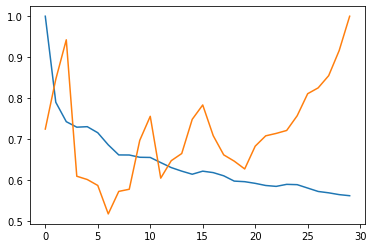

In [ ]:
x_axis=np.arange(len(knn_ve[:30]))
plt.plot(x_axis,knn_be_sc[:30])   #knn_be_sc[i]==knn_ve_sc[i]
plt.plot(x_axis,knn_ve_sc[:30])

In [ ]:
np.min(auc_be),np.argmin(auc_be)

(0.17877376879245785, 121)

In [ ]:
np.min(auc_ve),np.argmin(auc_ve)

(0.02341654209983238, 6)

In [ ]:
auc_ve[33],auc_be[6]

(0.04049851231082132, 0.22737046368099376)

In [ ]:
#n_neigh=7 with uniform least VE = 0.0234, BE=0.227
#n_neigh=34, VE=0.0404, BE=0.179

In [ ]:
np.abs((0.0404-0.0234))/0.0404

0.4207920792079208

In [ ]:
np.abs((0.227-0.179))/0.227

0.21145374449339213

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_be=[]
DT_ve=[]
for n in np.arange(3,150):
  DT=DecisionTreeClassifier(min_samples_leaf=n,criterion='entropy')
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(DT,X_std,Y,cv=kfold,scoring='roc_auc')
  DT_be.append(np.mean(1-scores))
  DT_ve.append(np.std(scores,ddof=1))

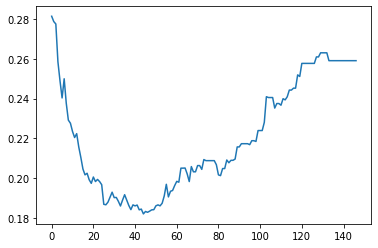

In [ ]:
x_axis=np.arange(len(DT_be))
plt.plot(x_axis,DT_be)

In [ ]:
np.min(DT_be),np.argmin(DT_be),DT_ve[44]

(0.18191019639887376, 44, 0.030464579060208496)

In [ ]:
np.min(DT_ve),np.argmin(DT_ve),DT_be[59]

(0.014069625605568402, 59, 0.19617474710287125)

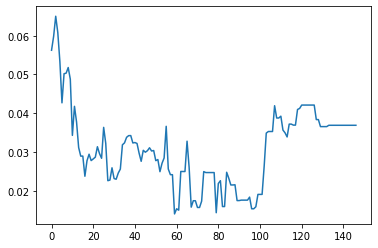

In [ ]:
x_axis=np.arange(len(DT_ve))
plt.plot(x_axis,DT_ve)

In [24]:
LR=LogisticRegression()
LR_be=[]
LR_ve=[]
for n in np.arange(1,100):
  LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(LR_bag,X_std,Y,cv=kfold,scoring='roc_auc')
  LR_be.append(np.mean(1-scores))
  LR_ve.append(np.std(scores,ddof=1))

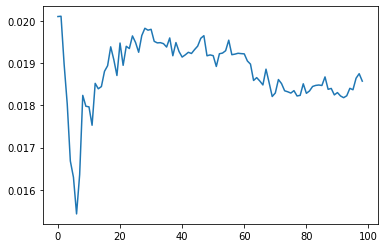

In [ ]:
x_axis=np.arange(len(LR_ve))
plt.plot(x_axis,LR_ve)

In [ ]:
np.min(LR_ve),np.argmin(LR_ve),LR_be[6]

(0.015432416393430588, 6, 0.16641071690629455)

In [ ]:
LR=LogisticRegression()
LR_be=[]
LR_ve=[]
for n in np.arange(1,100):
  LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(LR_boost,X_std,Y,cv=kfold,scoring='roc_auc')
  LR_be.append(np.mean(1-scores))
  LR_ve.append(np.std(scores,ddof=1))

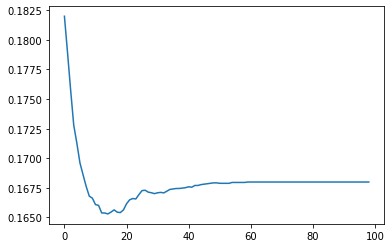

In [ ]:
x_axis=np.arange(len(LR_be))
plt.plot(x_axis,LR_be)

In [ ]:
np.min(LR_be),np.argmin(LR_be),LR_ve[14]

(0.1652985325918152, 14, 0.022717492461943073)

In [ ]:
(0.022717492461943073-0.015432416393430588)/0.022717492461943073

0.32068134635530887

In [ ]:
(0.16641071690629455-0.1652985325918152)/0.16641071690

0.006683369528103676

In [25]:
NB=GaussianNB()
NB_be=[]
NB_ve=[]
for n in np.arange(1,100):
  NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(NB_boost,X_std,Y,cv=kfold,scoring='roc_auc')
  NB_be.append(np.mean(1-scores))
  NB_ve.append(np.std(scores,ddof=1))

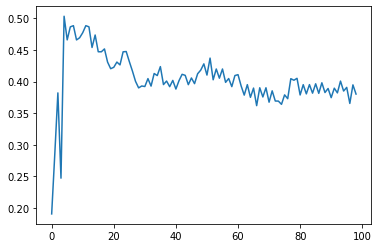

In [ ]:
x_axis=np.arange(len(NB_be))
plt.plot(x_axis,NB_be)

In [ ]:
np.min(NB_be),np.argmin(NB_be)

(0.19074559548486053, 0)

In [ ]:
1-0.19074559548486053

0.8092544045151395

In [26]:
knn=KNeighborsClassifier(n_neighbors=50,weights='distance')

In [ ]:

BagKNN_be=[]
BagKNN_ve=[]
for n in np.arange(1,100):
  knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(knn_bag,X_std,Y,cv=kfold,scoring='roc_auc')
  BagKNN_be.append(np.mean(1-scores))
  BagKNN_ve.append(np.std(scores,ddof=1))

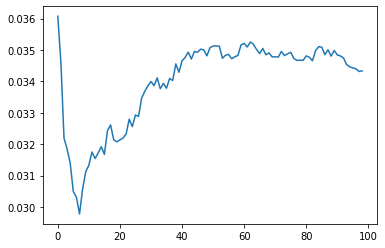

In [ ]:
x_axis=np.arange(len(BagKNN_ve))
plt.plot(x_axis,BagKNN_ve)

In [ ]:
np.min(BagKNN_ve),np.argmin(BagKNN_ve),BagKNN_be[7]

(0.02977730208307332, 7, 0.17913907629036005)

In [ ]:
1-0.179

0.821

In [27]:
from sklearn import model_selection

In [ ]:
RF_be=[]
RF_ve=[]
for n in np.arange(1,100):
  RF=RandomForestClassifier(criterion='entropy',n_estimators=n,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(RF,X_std,Y,cv=kfold,scoring='roc_auc')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

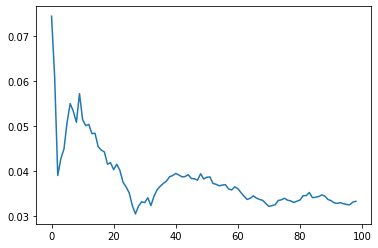

In [ ]:
x_axis=np.arange(len(RF_ve))
plt.plot(x_axis,RF_ve)

In [ ]:
np.min(RF_ve),np.argmin(RF_ve)

(0.03046757644365641, 27)

In [ ]:
1-0.26

0.74

In [ ]:
np.min(RF_ve),np.argmin(RF_ve)

(0.022681342627470468, 30)

In [ ]:
np.min(RF_be),np.argmin(RF_be)

(0.16658408782486578, 97)

In [28]:
RF=RandomForestClassifier(criterion='entropy',n_estimators=31,random_state=0)

In [ ]:
RF_be=[]
RF_ve=[]
for n in np.arange(1,100):
  RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=n,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(RF_boost,X_std,Y,cv=kfold,scoring='roc_auc')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

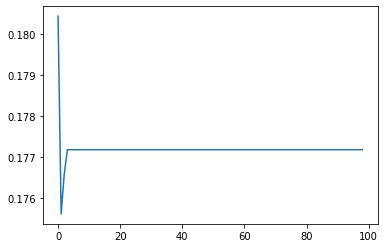

In [ ]:
x_axis=np.arange(len(RF_be))
plt.plot(x_axis,RF_be)

In [ ]:
np.min(RF_be),np.argmin(RF_be)

(0.17560564800190478, 1)

In [29]:
LR=LogisticRegression()

In [ ]:
BagLR_be=[]
BagLR_ve=[]
for n in np.arange(1,100):
  BagLR=BaggingClassifier(base_estimator=LR,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(BagLR,X_std,Y,cv=kfold,scoring='roc_auc')
  BagLR_be.append(np.mean(1-scores))
  BagLR_ve.append(np.std(scores,ddof=1))

In [ ]:
np.min(BagLR_be),np.argmin(BagLR_be)

(0.16430385327985358, 18)

In [ ]:
np.min(BagLR_ve),np.argmin(BagLR_ve)

(0.01582846618889178, 6)

In [ ]:
BoostLR_be=[]
BoostLR_ve=[]
for n in np.arange(1,100):
  LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(LR_boost,X_std,Y,cv=kfold,scoring='roc_auc')
  BoostLR_be.append(np.mean(1-scores))
  BoostLR_ve.append(np.std(scores,ddof=1))

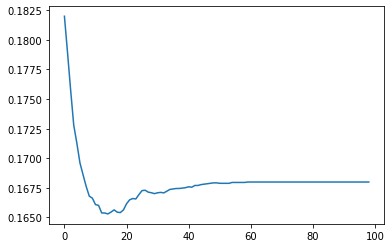

In [ ]:
x_axis=np.arange(len(BoostLR_be))
plt.plot(x_axis,BoostLR_be)

In [ ]:
np.min(BoostLR_be),np.argmin(BoostLR_be)

(0.1652985325918152, 14)

In [ ]:
BagNB_be=[]
BagNB_ve=[]
for n in np.arange(1,100):
  BagNB=BaggingClassifier(base_estimator=NB,n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(BagNB,X_std,Y,cv=kfold,scoring='roc_auc')
  BagNB_be.append(np.mean(1-scores))
  BagNB_ve.append(np.std(scores,ddof=1))

In [ ]:
np.min(BagNB_be),np.argmin(BagNB_be)

(0.1828105395165684, 93)

In [ ]:
np.min(BagNB_ve),np.argmin(BagNB_ve)

(0.029265621700989588, 5)

In [ ]:
GB_be=[]
GB_ve=[]
for n in np.arange(1,150):
  GB=GradientBoostingClassifier(n_estimators=n,random_state=0)
  kfold=model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(GB,X_std,Y,cv=kfold,scoring='roc_auc')
  GB_be.append(np.mean(1-scores))
  GB_ve.append(np.std(scores,ddof=1))

In [ ]:
np.min(GB_be),np.argmin(GB_be)

(0.16887442710124695, 26)

In [ ]:
np.min(GB_ve),np.argmin(GB_ve)

(0.02003801430663934, 46)

In [33]:
LR=LogisticRegression()
NB=GaussianNB()
#update and redifine your knn model
KNN=KNeighborsClassifier(n_neighbors=50, weights='distance')
KNN_bag=BaggingClassifier(base_estimator=KNN,n_estimators=7,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=31,random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=2,random_state=0)
Bagged_LR=BaggingClassifier(base_estimator=LR,n_estimators=7,random_state=0)
Boosted_LR=AdaBoostClassifier(base_estimator=LR,n_estimators=15,random_state=0)
Bagged_NB=BaggingClassifier(base_estimator=NB,n_estimators=6,random_state=0)
GBoost=GradientBoostingClassifier(n_estimators=27,random_state=0)

In [45]:
vot_class = VotingClassifier(estimators = [('BoostedLR', Boosted_LR),('Bagged_LR',Bagged_LR)],voting='soft')

In [46]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('KNN_bag',KNN_bag))
models.append(('RF',RF))
models.append(('BoostedRF',RF_boost))
models.append(('BaggedLR',Bagged_LR))
models.append(('BoostedLR',Boosted_LR))
models.append(('BaggedNB',Bagged_NB))
models.append(('GBoost',GBoost))
models.append(('Voting',vot_class))

Logistic: 0.840951 (0.022228)
NaiveBayes: 0.813258 (0.039813)
KNN: 0.831954 (0.040137)
KNN_bag: 0.827743 (0.044190)
RF: 0.822748 (0.027345)
BoostedRF: 0.835766 (0.032358)
BaggedLR: 0.841308 (0.020523)
BoostedLR: 0.840493 (0.025688)
BaggedNB: 0.812659 (0.039652)
GBoost: 0.832523 (0.031423)
Voting: 0.841419 (0.021093)


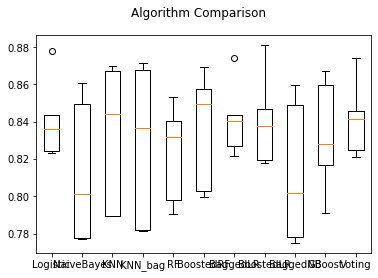

In [47]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
((0.841419-0.841308)/0.841419)*100

0.013192000656044521

In [49]:
((0.021093-0.020523)/0.021093)*100

2.702318304650837

In [ ]:
(0.834701-0.834109)/0.834701

0.0007092360018737691

In [ ]:
(0.022717-0.015593)/0.022717

0.313597746181274

In [ ]:
(0.83472-0.834109)/0.83472

0.0007319819819820157

In [ ]:
(0.017-0.015593)/0.017

0.08276470588235306

In [ ]:
(0.020701-0.015432)/0.020701

0.25452876672624514

In [ ]:
(0.834701-0.833591)/0.834701

0.0013298175035133003

In [ ]:
(0.022717-)

In [ ]:
(0.166411-0.159814)/0.166411

0.039642812073721036

In [ ]:
#FINAL INFERENCE: BaggedLR having 25.45% less VE when compared to Stacked Model by
#trading off only 3.9% in BE